# 7장 시계열 데이터를 다뤄보자

## 7-1. Numpy의 polyfit으로 회귀(regression) 분석하기


prophet은 페이스북에서 개발한 시계열 예측 패키지
ARIMA와 같은 확률론적이고 이론적인 모형이 아니라 몇가지 경험적 규칙(heuristic rule)을 사용하는 단순 회귀모형이지만 단기적 예측에서는 큰 문제 없이 사용할 수 있다.

1. (time series) 시계열 자료
년도별 계절별 월별 일별 시 분 초별로 시간의 흐름에 따라 관측된 자료

2. 시계열자료의 여러 형태
시계열그림(time series plot)
시간의 경과에 따라 시계열 자료의 값이 변하는 것을 그린 그림

시계열자료의 분석 목적:
1) (forecase) 미래에 대한 예측
2) 시스템 또는 확률과정으 이해와 제어(control)
==============================================
fbprophet:페이스북에서 만든 모듈을 사용하기 위한 절차

1. visual c++ build tools

2.
- pip install pystan 혹은
- conda install -c conda-forge pystan

3.
- conda install -c conda-forge fbprophet
- pip install fbprophet

4.
- pip install pandas_datareader
- conda install -c anaconda pandas-datareader

5. 아래중 하나만 수행되면 ok
- pip install fix_yahoo_finance
- pip install yahoo-finance
- pip install yfinance --upgrade --no-cache-dir
- pip install yfinance -U

python -m pip install -upgrade --user

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet
from datetime import datetime

In [18]:
pweb = pd.read_csv('../data/08. PinkWink Web Traffic.csv', encoding='utf-8'
                  ,thousands=','
                  ,names=['date','hit']
                  ,index_col=0)
pweb = pweb[pweb['hit'].notnull()]
pweb.head()


,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


<AxesSubplot:xlabel='date'>

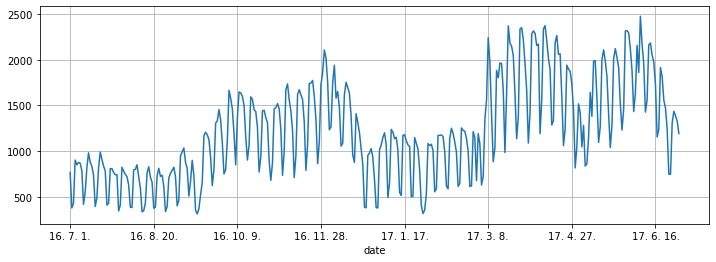

In [19]:
pweb['hit'].plot(figsize=(12,4), grid=True)

In [20]:
time = np.arange(0,len(pweb))
traffic = pweb['hit'].values
fx = np.linspace(0, time[-1], 1000)
fx

array([  0.        ,   0.36436436,   0.72872873,   1.09309309,
         1.45745746,   1.82182182,   2.18618619,   2.55055055,
         2.91491491,   3.27927928,   3.64364364,   4.00800801,
         4.37237237,   4.73673674,   5.1011011 ,   5.46546547,
         5.82982983,   6.19419419,   6.55855856,   6.92292292,
         7.28728729,   7.65165165,   8.01601602,   8.38038038,
         8.74474474,   9.10910911,   9.47347347,   9.83783784,
        10.2022022 ,  10.56656657,  10.93093093,  11.2952953 ,
        11.65965966,  12.02402402,  12.38838839,  12.75275275,
        13.11711712,  13.48148148,  13.84584585,  14.21021021,
        14.57457457,  14.93893894,  15.3033033 ,  15.66766767,
        16.03203203,  16.3963964 ,  16.76076076,  17.12512513,
        17.48948949,  17.85385385,  18.21821822,  18.58258258,
        18.94694695,  19.31131131,  19.67567568,  20.04004004,
        20.4044044 ,  20.76876877,  21.13313313,  21.4974975 ,
        21.86186186,  22.22622623,  22.59059059,  22.95

In [21]:
# 평균제곱오차
# 오차 = (예측값 - 실제값) ** 2
def error(f, x, y):
    return np.sqrt(np.mean((f(x)-y)**2))

In [23]:
# polyfit() 함수는 입력과 출력 값으로부터 다항식의 계수를 찾아주는 함수
# polyfit(x,y,n)
fp1 = np.polyfit(time, traffic, 1) # 다항식의 입력값 x, y 1차입니다.
f1 = np.poly1d(fp1)
print(f1)
f2p = np.polyfit(time, traffic, 2) # 다항식의 입력값 x, y 2차입니다.
f2 = np.poly1d(f2p)
print(f2)
f3p = np.polyfit(time, traffic, 3) # 다항식의 입력값 x, y 3차입니다.
f3 = np.poly1d(f3p)
print(f3)
f15p = np.polyfit(time, traffic, 15) # 다항식의 입력값 x, y 15차입니다.
f15 = np.poly1d(f15p)
print(f15)
print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

 
2.948 x + 678.4
           2
-0.001422 x + 3.465 x + 647.1
           3           2
3.341e-05 x - 0.01966 x + 6.117 x + 567.2
           15             14           13             12             11
2.375e-29 x  - 6.185e-26 x  + 7.3e-23 x  - 5.161e-20 x  + 2.429e-17 x 
              10             9             8             7
 - 8.002e-15 x  + 1.886e-12 x - 3.197e-10 x + 3.866e-08 x
              6             5            4          3         2
 - 3.267e-06 x + 0.0001871 x - 0.007045 x + 0.1768 x - 3.153 x + 32.78 x + 617.4
430.85973081109626
430.6284101894695
429.53280466762925
330.4777304274343


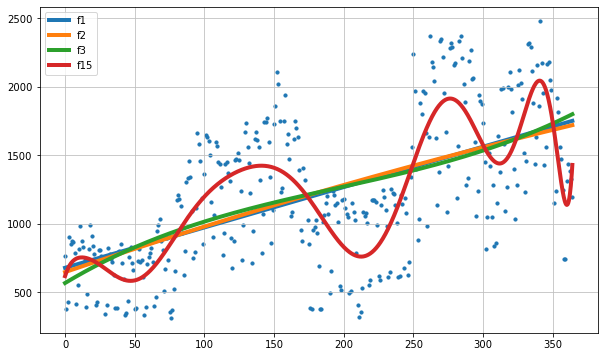

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(time, traffic, s=10)

plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')

plt.legend(loc=2)
plt.show()

## 7-2. Prophet 모듈을 이용한 forecast 예측

In [34]:
df = pd.DataFrame({'ds':pweb.index, 'y':pweb['hit']})
df.reset_index(inplace=True)
df['ds'] =  pd.to_datetime(df['ds'], format="%y. %m. %d.")
df.head()

,date,ds,y
0,16. 7. 1.,2016-07-01,766.0
1,16. 7. 2.,2016-07-02,377.0
2,16. 7. 3.,2016-07-03,427.0
3,16. 7. 4.,2016-07-04,902.0
4,16. 7. 5.,2016-07-05,850.0


In [35]:
# df['ds']생성했으므로 삭제
del df['date']
# Prohet() 함수를 사용시
# 주기성이 연단위 및 일단위 가 있다
# prophet 클래스 객체를 만들고 시계열 데이터를 입력으로 fit메서드를 호출한다.
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)

In [36]:
# 16. 7. 1. ~ 17. 06. 30. 홈페이지 방문자 수
# make_future_dataframe: 예측 날짜 구간 생성
future = m.make_future_dataframe(periods=60) # 60일간의 데이터를 예측
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [37]:
# predict: 신뢰 구간을 포함한 예측 실행한 데이터를 forecase 변수에 저장
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,896.576571,679.255750,1099.102282
421,2017-08-26,481.544412,276.435213,710.816417
422,2017-08-27,614.212001,397.791965,821.666407
423,2017-08-28,1166.966207,973.317941,1382.320294
424,2017-08-29,1203.000155,995.297725,1412.705115


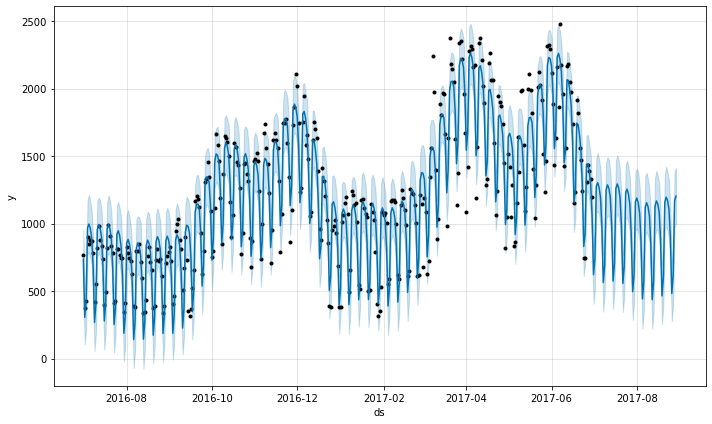

In [38]:
m.plot(forecast);

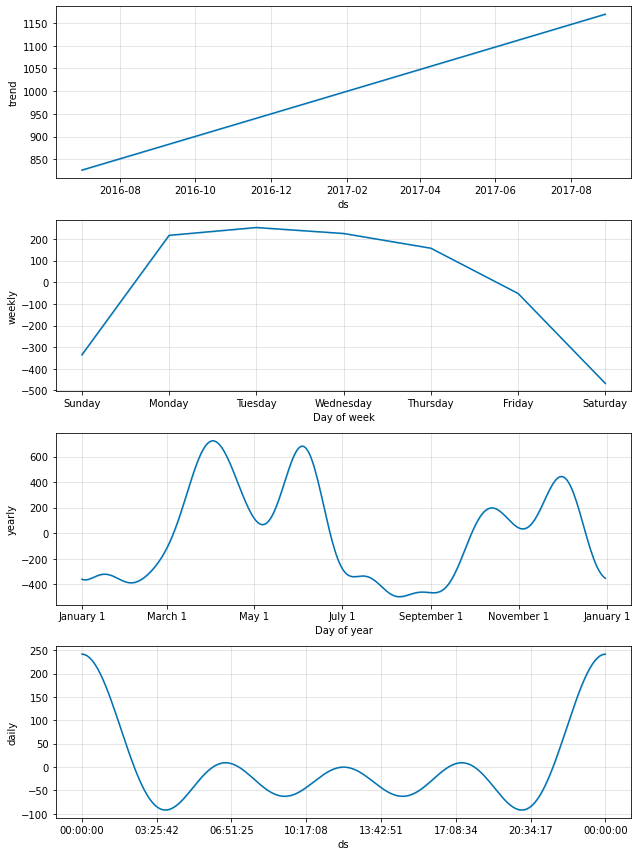

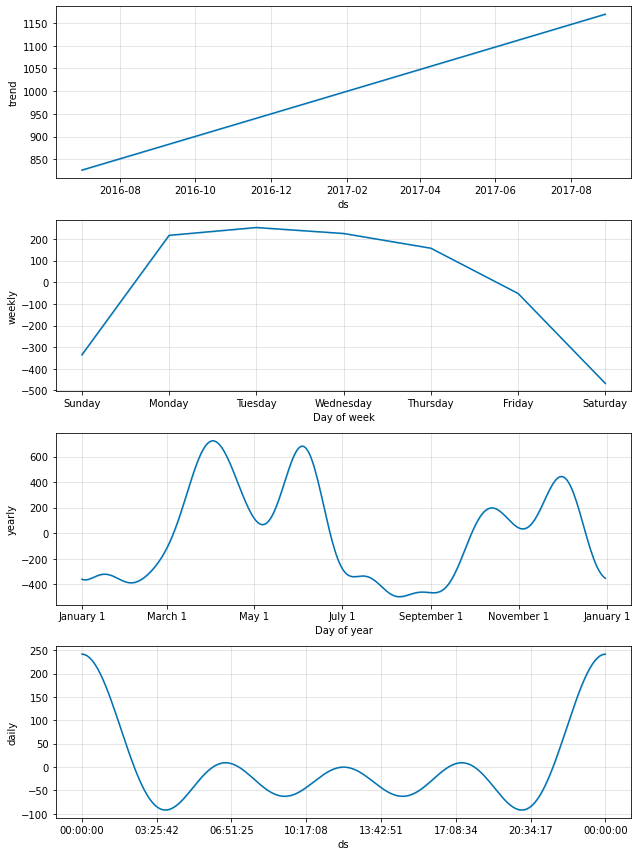

In [39]:
m.plot_components(forecast)

## 7-3. Seasonal 시계열 분석으로 주식 데이터 분석하기

In [41]:
from pandas_datareader import data

In [43]:
start = datetime(2020,1,1)
end = datetime(2020,6,2)

df = data.DataReader("^KS11","yahoo", start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,2202.320068,2171.840088,2201.209961,2175.169922,494700,2175.169922
2020-01-03,2203.379883,2165.389893,2192.580078,2176.459961,631600,2176.459961
2020-01-06,2164.419922,2149.949951,2154.969971,2155.070068,592700,2155.070068
2020-01-07,2181.620117,2164.270020,2166.600098,2175.540039,568200,2175.540039
2020-01-08,2162.320068,2137.719971,2156.270020,2151.310059,913800,2151.310059


In [57]:
start_date = '2009-7-1' 
end_date = '2019-7-31' 
SAM = data.get_data_yahoo('005930.KS', start_date, end_date) # 삼성
SAM_trunc=SAM[:'2017-6-30']
SAM.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-07-01,12120.0,11800.0,11880.0,12060.0,14641400.0,9515.540039
2009-07-02,12200.0,12000.0,12200.0,12040.0,12677100.0,9499.759766
2009-07-03,12040.0,11880.0,11900.0,12020.0,11348350.0,9483.981445
2009-07-06,12820.0,12180.0,12200.0,12680.0,46675200.0,10004.729492
2009-07-07,13120.0,12860.0,12980.0,13000.0,30934250.0,10257.217773


<AxesSubplot:xlabel='Date'>

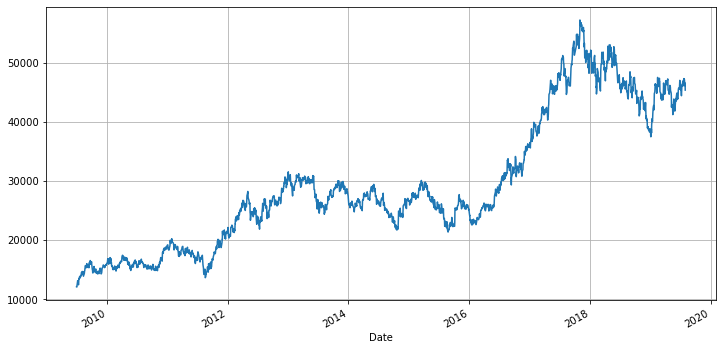

In [59]:
SAM['Close'].plot(figsize=(12,6), grid=True)

In [60]:
start_date = '2009-7-1' 
end_date = '2019-7-31' 
KAKAO = data.get_data_yahoo('035720.KS', start_date, end_date) # 카카오
KAKAO_trunc=SAM[:'2017-6-30']
KAKAO.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-07-01,9106.477539,8673.315430,8965.448242,8673.315430,750545.0,8184.398438
2009-07-02,8834.492188,8441.624023,8683.388672,8592.726562,821484.0,8108.351562
2009-07-03,8784.124023,8391.255859,8441.624023,8774.050781,829658.0,8279.454102
2009-07-06,9015.815430,8713.609375,8774.050781,8774.050781,533883.0,8279.454102
2009-07-07,9267.654297,8703.536133,8824.417969,9207.212891,1665904.0,8688.200195


In [61]:
df = pd.DataFrame({
    'ds':SAM_trunc.index
    ,'y':SAM_trunc['Close']
})
df

,ds,y
Date,,
2009-07-01,2009-07-01,12060.0
2009-07-02,2009-07-02,12040.0
2009-07-03,2009-07-03,12020.0
2009-07-06,2009-07-06,12680.0
2009-07-07,2009-07-07,13000.0
...,...,...
2017-06-26,2017-06-26,48280.0
2017-06-27,2017-06-27,48300.0
2017-06-28,2017-06-28,47700.0


In [48]:
df.reset_index(inplace=True)
df

,Date,ds,y
0,2009-07-01,2009-07-01,12060.0
1,2009-07-02,2009-07-02,12040.0
2,2009-07-03,2009-07-03,12020.0
3,2009-07-06,2009-07-06,12680.0
4,2009-07-07,2009-07-07,13000.0
...,...,...,...
1980,2017-06-26,2017-06-26,48280.0
1981,2017-06-27,2017-06-27,48300.0
1982,2017-06-28,2017-06-28,47700.0
1983,2017-06-29,2017-06-29,47940.0


In [49]:
del df['Date']
df.head()

,ds,y
0,2009-07-01,12060.0
1,2009-07-02,12040.0
2,2009-07-03,12020.0
3,2009-07-06,12680.0
4,2009-07-07,13000.0


In [50]:
# 주기성이 일단위로 있다고 알려줌
m = Prophet(daily_seasonality=True)
m.fit(df)

In [51]:
# 1년(365일) 후 주가를 예측하겠다
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
2345,2018-06-26
2346,2018-06-27
2347,2018-06-28
2348,2018-06-29
2349,2018-06-30


In [52]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2345,2018-06-26,56619.407654,51994.470502,61613.709158
2346,2018-06-27,56574.905794,51917.394216,61649.528104
2347,2018-06-28,56562.643241,51905.237829,61599.943928
2348,2018-06-29,56460.633935,51826.492477,61592.009033
2349,2018-06-30,56038.726898,51344.297650,61267.463254


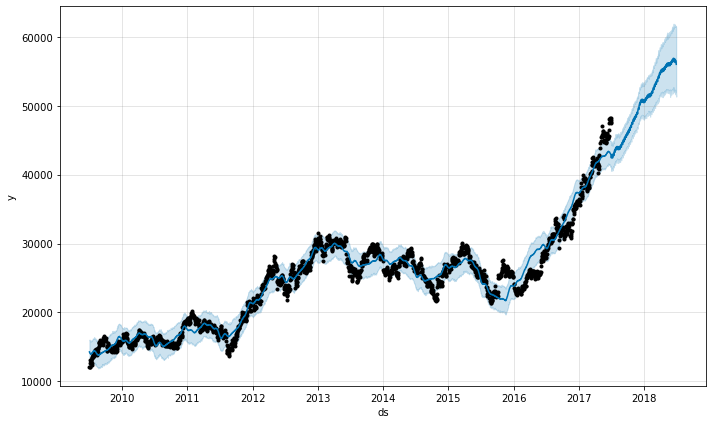

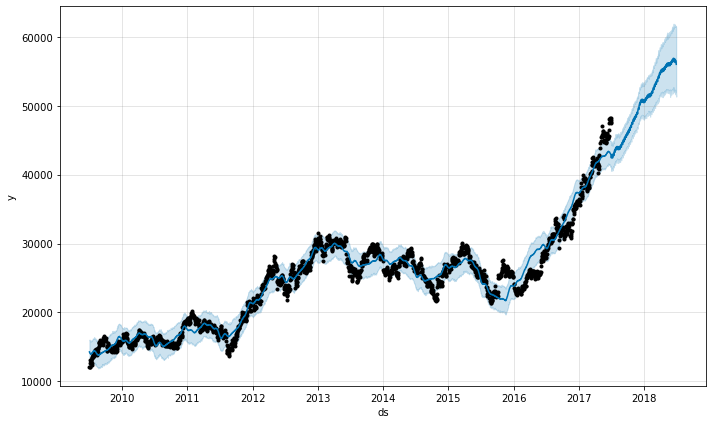

In [53]:
m.plot(forecast)

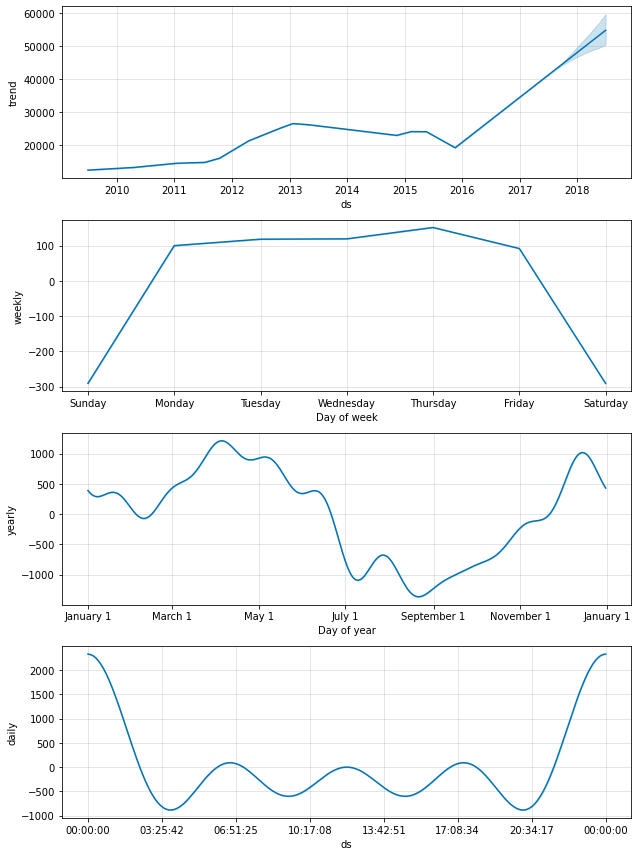

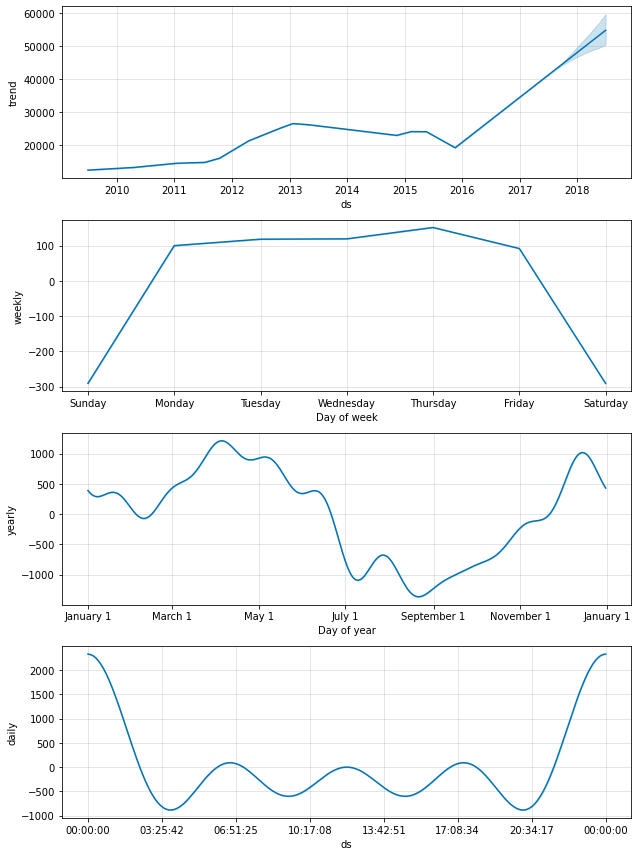

In [54]:
m.plot_components(forecast)

<AxesSubplot:xlabel='Date'>

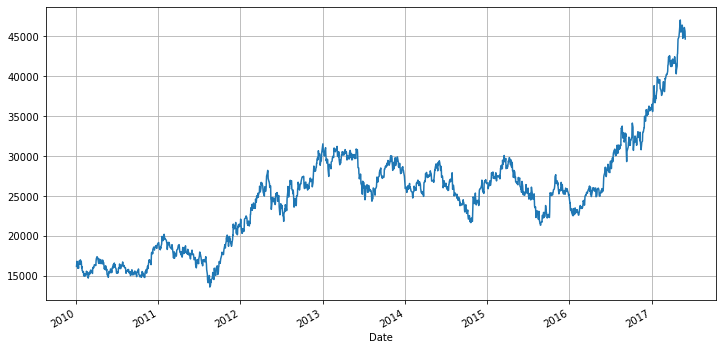

In [55]:
start_date = '2010-1-1' 
end_date = '2017-7-31' 
SAM = data.get_data_yahoo('005930.KS', start_date, end_date) # 삼성
SAM_trunc=SAM[:'2017-5-30']
SAM_trunc['Close'].plot(figsize=(12,6), grid=True)

In [63]:
df = pd.DataFrame({
    'ds':SAM_trunc.index
    ,'y':SAM_trunc['Close']
})
df.reset_index(inplace=True)
del df['Date']
df

,ds,y
0,2009-07-01,12060.0
1,2009-07-02,12040.0
2,2009-07-03,12020.0
3,2009-07-06,12680.0
4,2009-07-07,13000.0
...,...,...
1980,2017-06-26,48280.0
1981,2017-06-27,48300.0
1982,2017-06-28,47700.0
1983,2017-06-29,47940.0


In [67]:
#
m = Prophet(daily_seasonality=True)
m.fit(df)

In [68]:
future=m.make_future_dataframe(periods=61)
future.tail()

,ds
2041,2017-08-26
2042,2017-08-27
2043,2017-08-28
2044,2017-08-29
2045,2017-08-30


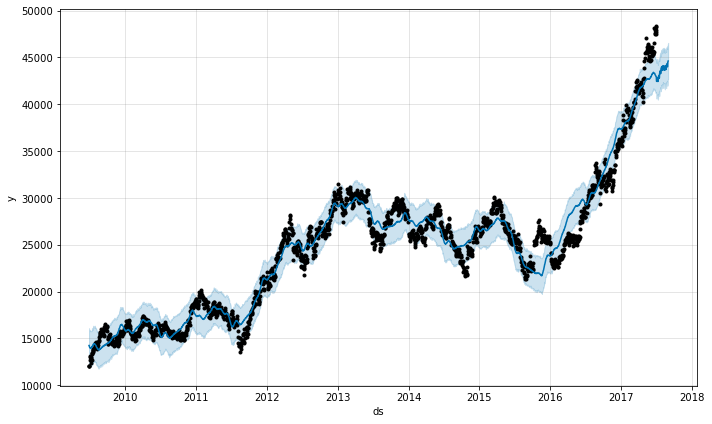

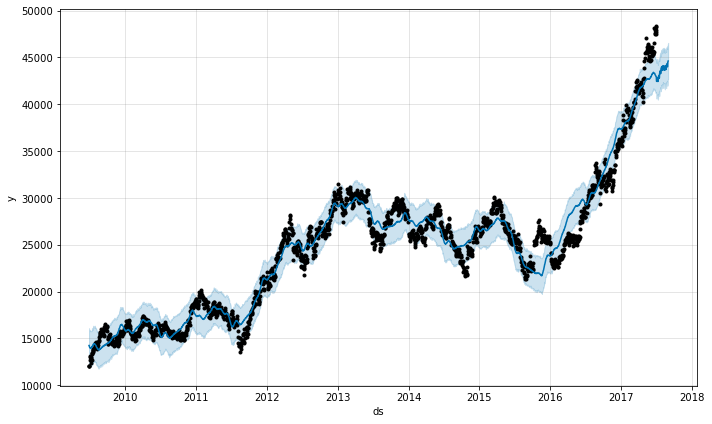

In [69]:
forecast = m.predict(future)
m.plot(forecast)

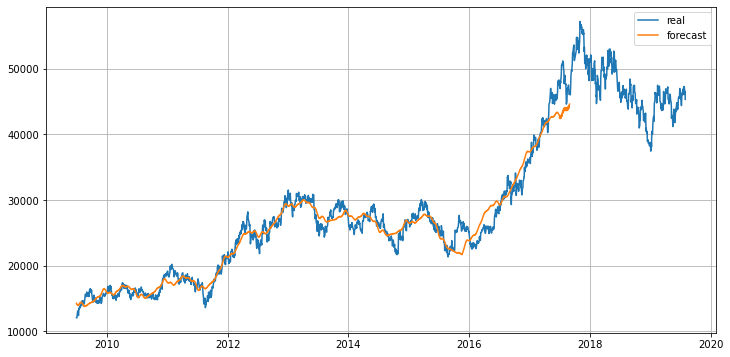

In [73]:
plt.figure(figsize=(12,6))
plt.plot(SAM.index, SAM['Close'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

In [74]:
df = pd.read_csv('../data/08. example_wp_R.csv')
df['y'] = np.log(df['y'])
df

,ds,y
0,2008-01-30,5.976351
1,2008-01-16,6.049733
2,2008-01-17,6.011267
3,2008-01-14,5.953243
4,2008-01-15,5.910797
...,...,...
2858,2015-12-11,7.834788
2859,2015-12-12,7.360104
2860,2015-12-13,7.479864
2861,2015-12-18,7.765145


In [75]:
df['cap'] = 8.5 # 상한값
df['floor'] = 6 # 하한값

In [77]:
m = Prophet(growth='logistic', daily_seasonality=True)
m.fit(df)

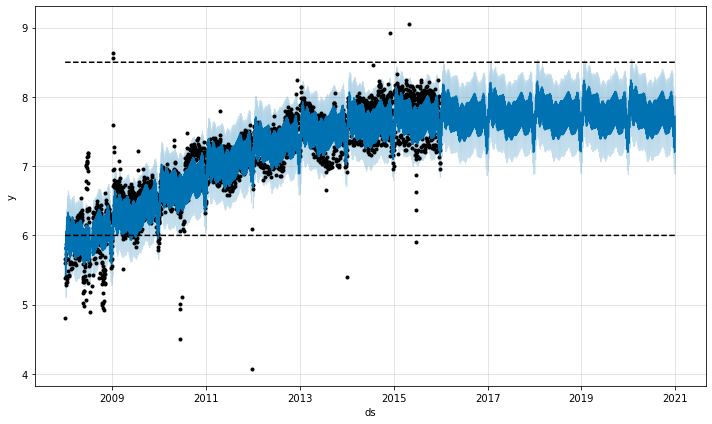

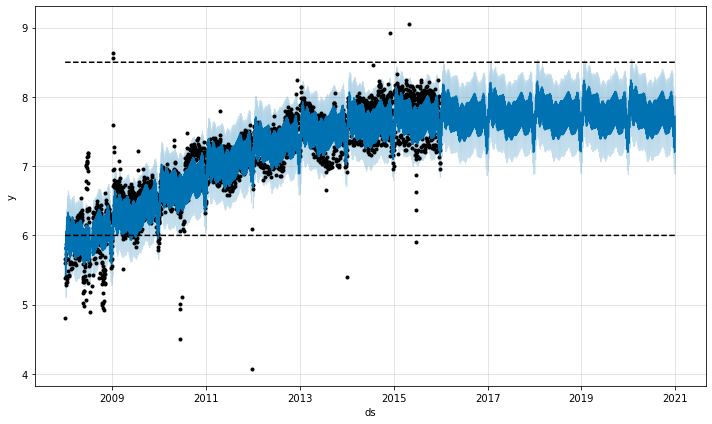

In [79]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5 # 상한값
future['floor'] = 6 # 하한값
fcst = m.predict(future)
m.plot(fcst)

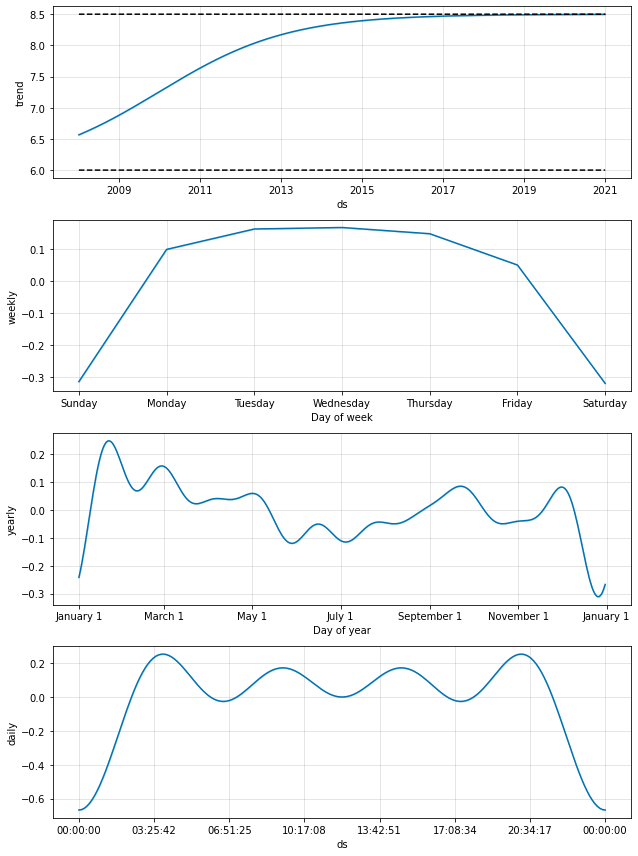

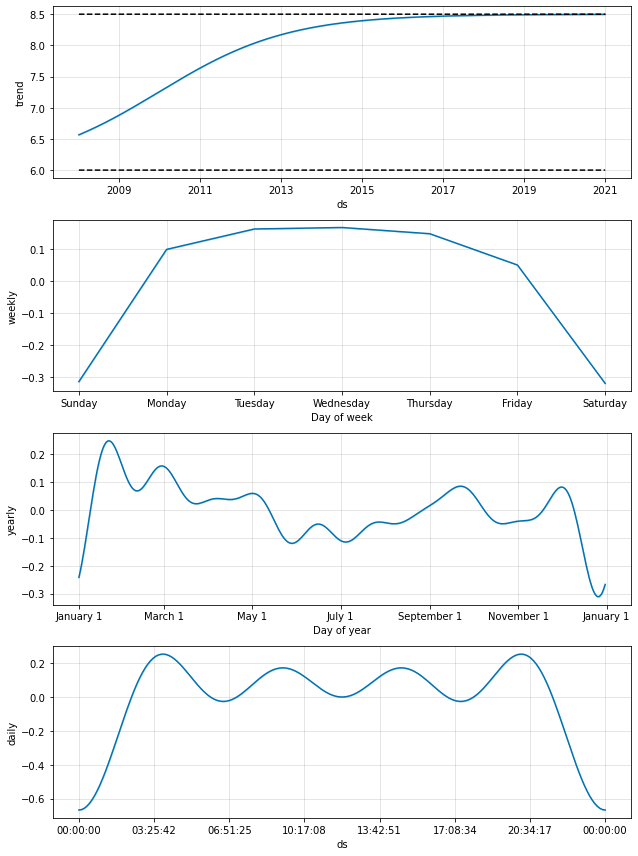

In [80]:
forecast = m.predict(future)
m.plot_components(forecast)